In [14]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString
import fiona

#These file paths will need to be changed based on your ocm
df2 = pd.read_csv("/home/tzion/NavigatorDA/geohydro-vis/HeatMap/Exo_2022-4-30.csv")
df = pd.read_csv("/home/tzion/NavigatorDA/geohydro-vis/HeatMap/Navigator_2022-04-30_processed_filtered.csv")


In [15]:
geometry = [Point(xy) for xy in zip(df.Lon, df.Lat)]
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df,crs=crs, geometry=geometry)
gdf.to_file(driver='ESRI Shapefile', filename='nav.shp')

geometry2 = [Point(xy) for xy in zip(df2.Lon + .002, df2.Lat)]
gdf2 = gpd.GeoDataFrame(df2,crs=crs, geometry=geometry2)
gdf2.to_file(driver='ESRI Shapefile', filename='nav2.shp')

geometry3 = LineString(list(zip(df2.Lon + .001,df2.Lat)))

#geometry3 = [Point(xy) for xy in zip(df2.Lon + .001, df2.Lat)]
#gdf3 = gpd.GeoDataFrame(df2,crs=crs, geometry=geometry3)
#gdf3.to_file(driver='ESRI Shapefile', filename='nav3.shp')

gdf = gpd.read_file('nav.shp', driver='ESRI Shapefile')
gdf2 = gpd.read_file('nav2.shp', driver='ESRI Shapefile')

/home/tzion/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_7343/1782545143.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(driver='ESRI Shapefile', filename='nav.shp')
/home/tzion/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_7

In [16]:
s = gpd.GeoSeries(geometry3)


In [13]:
gdf2.head()

,Timestamp,Cond S/cm,nLF Cond S,ODO % sat,ODO % loca,ODO mg/L,Sal psu,SpCond S/c,TDS mg/L,Turbidity,TSS mg/L,pH,pH mV,Temp C,Battery V,Cable Pwr,Lat,Lon,geometry
0,1651337400,6.1,7.0,61.0,71.7,5.61,0.0,6.9,4.0,9.53,0.0,7.77,-56.9,19.384,5.11,0.0,35.020602,-106.673033,POINT (-106.67103 35.02060)
1,1651337520,4.7,5.7,60.7,71.3,5.93,0.0,5.7,4.0,9.55,0.0,7.50,-40.1,16.473,5.01,0.0,35.019630,-106.672645,POINT (-106.67065 35.01963)
2,1651337640,4.3,5.3,60.2,70.7,5.95,0.0,5.2,3.0,9.57,0.0,7.50,-40.2,15.883,4.91,0.0,35.018696,-106.672015,POINT (-106.67001 35.01870)
3,1651337760,4.0,5.1,59.9,70.4,6.12,0.0,5.0,3.0,9.61,0.0,7.46,-37.8,14.428,5.01,0.0,35.017853,-106.671659,POINT (-106.66966 35.01785)
4,1651337880,3.8,4.9,60.2,70.8,6.23,0.0,4.9,3.0,9.54,0.0,7.38,-32.9,13.859,4.99,0.0,35.017008,-106.671397,POINT (-106.66940 35.01701)


In [35]:
%matplotlib notebook

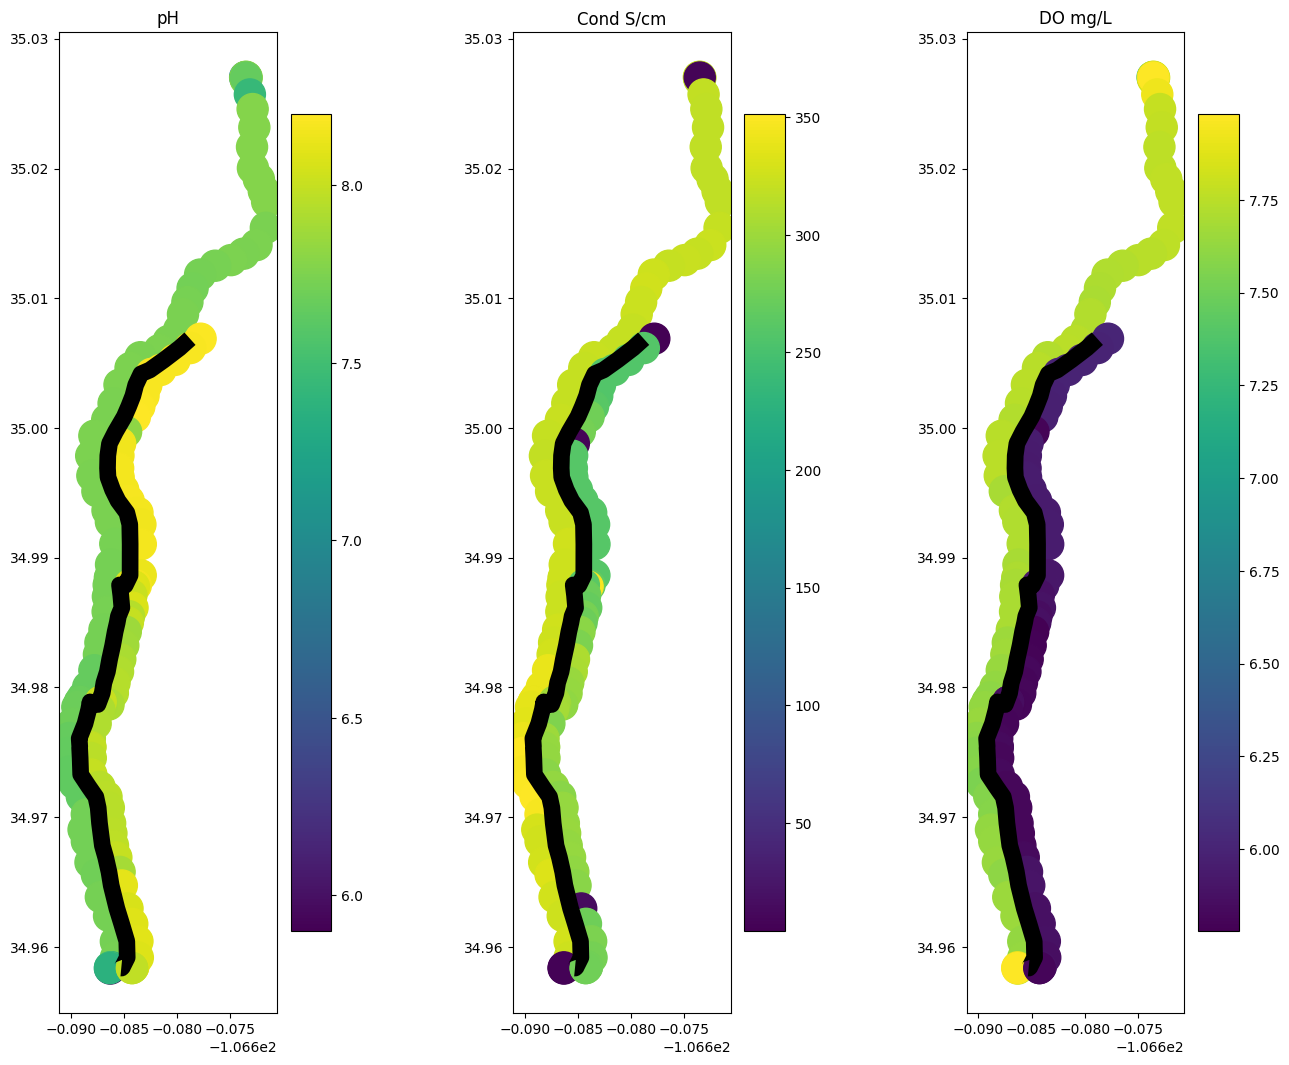

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig,ax = plt.subplots(ncols=3,figsize=(15,15))
ax[0].set_aspect('equal')
fig.tight_layout(pad=10)

for pl in ax:
    s.plot(ax=pl, linewidth=12, color='black')
    
ax[0].set_title("pH")
norm = mpl.colors.Normalize(vmin=min(df['Y4000pH'].min(),df2['pH'].min()), vmax=max(df['Y4000pH'].max(),df2['pH'].max()))
gdf.plot("Y4000pH",ax=ax[0], markersize=500, norm=norm, legend=True)
gdf2.plot("pH",ax=ax[0],markersize=500, norm=norm)

ax[1].set_title("Cond S/cm")
norm = mpl.colors.Normalize(vmin=min(df['Y4000Cond'].min(),df2['Cond S/cm'].min()), vmax=max(df['Y4000Cond'].max(),df2['Cond S/cm'].max()))
gdf.plot("Y4000Cond",ax=ax[1], markersize=500, norm=norm, legend=True)
gdf2.plot("Cond S/cm",ax=ax[1],markersize=500, norm=norm)

ax[2].set_title("DO mg/L")
norm = mpl.colors.Normalize(vmin=min(df['Y4000DOmgL'].min(),df2['ODO mg/L'].min()), vmax=max(df['Y4000DOmgL'].max(),df2['ODO mg/L'].max()))
gdf.plot("Y4000DOmgL",ax=ax[2], markersize=500, norm=norm, legend=True)
gdf2.plot("ODO mg/L",ax=ax[2],markersize=500, norm=norm)
plt.savefig("Nav-4-30-figs-11-28-22", dpi=200)
plt.show()
#gdf3.plot(kind='scatter', ax=ax)
#gdf3.plot(ax=ax,markersize=5,color='black')

#gpd.plotting.plot_multilinestring(ax,geometry3,color='black',linewidth='5')
#ax.plot(df2['Lat'],df2['Lon'])

